In [158]:
%matplotlib notebook
import sympy as s
import math as m
import numpy as np
import matplotlib.pyplot as plt
from sympy import init_printing
import scipy.integrate as sc


## I. Équations du mouvement d’une particule matérielle dans l’espace-temps du trou noir
Le but est de résoudre les équations


### 1) Cas de la chute libre

L'équation du mouvement obtenue s'écrit : 
$$c\tau=2r_{0}\sqrt{\frac{r_{0}}{R_{S}}}\left[\frac{\pi}{2}-arcsin\left(\sqrt{\frac{r}{r_{0}}}\right)+\sqrt{\frac{r}{r_{0}}\left(1-\frac{r}{r_{0}}\right)}\right]$$
et 
$$\frac{dt}{d\tau}=\frac{\sqrt{1-\frac{R_{S}}{r_{0}}}}{1-\frac{R_{S}}{r}}$$

In [162]:
from sympy import *
x = symbols('x') # maintenant je peux utiliser la variable x pour mes calculs.
a = symbols('a')
F = integrate(1/sqrt(-1+a/x**2),x)
from IPython.display import display
display(F)

⎧           _________              
⎪          ╱       2       │ 2│    
⎪         ╱       x        │x │    
⎪-ⅈ⋅√a⋅  ╱   -1 + ──   for ──── > 1
⎪      ╲╱         a        │a│     
⎨                                  
⎪          ________                
⎪         ╱      2                 
⎪        ╱      x                  
⎪ -√a⋅  ╱   1 - ──      otherwise  
⎩     ╲╱        a                  

###  tentative de résolution avec des calculs analytiques
On a eu des problèmes pour tracer la courbe temporelle. Il n'y a apparemment pas de calcul analytique mais il faut passer par une intégration numérique. 

<IPython.core.display.Javascript object>


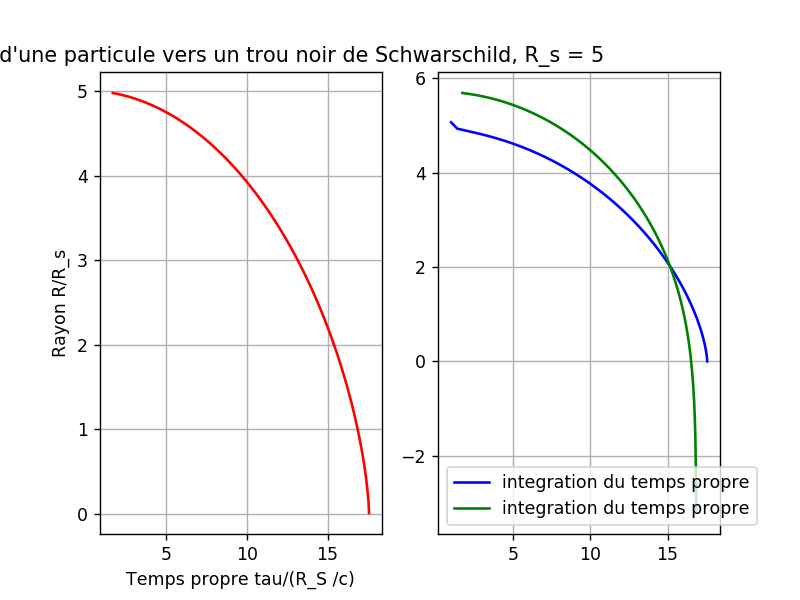

C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log


In [156]:
def f(r, r_0 = 5):
    return r_0**(3/2) *(np.pi/2 - np.arcsin(np.sqrt(r/r_0)) + np.sqrt(r/r_0*(1-r/r_0)))

R = np.arange(0,5, 0.01)

T = f(R)

def inv_f(tau, time = T, rayon = R):
    for i in range (len(T)-1):
        if time[i]<tau : 
            return rayon[i]

inv_f = np.vectorize(inv_f)

def dt(r, r_0 = 5):
    return np.sqrt(1-1/r_0) / (1 - 1/f(r, r_0))

def int_t(x):
    return np.sqrt(1-1/r_0)*(np.log(x - 1) + x)

def test(x):
    return x**2

def integrate(r_t):
    return sc.quad(dt, 0, r_t)[0]
#time = sc.odeint(dt, 5, R)

plt.figure()
plt.subplot(1,2,1)
plt.grid()
plt.title("Chute libre d'une particule vers un trou noir de Schwarschild, R_s = 5")
plt.ylabel("Rayon R/R_s")
plt.xlabel("Temps propre tau/(R_S /c)")
#plt.plot(T,R)
plt.plot(T, inv_f(T), 'r')
plt.subplot(1,2,2)
plt.grid()
plt.plot(T, np.vectorize(integrate)(R), 'b', label = "integration du temps propre")
#plt.plot(T, dt(R), 'r', label = "dérivée")
plt.plot(T, int_t(inv_f(T)), 'g', label = "integration du temps propre")
plt.legend()
plt.show()

### Résolution avec un intégrateur numérique
On a passe alors avec un intégrateur numérique (odeint en python). On lui demande de résoudre l'équation différentielle suivante en 
$ Y=\left(\begin{array}{c}
r\\
\dot{r}\\
t
\end{array}\right) $, où le point signifie $\frac{\partial}{\partial\tau}$
$$
\dot{Y}=\left(\begin{array}{c}
\dot{r}\\
\ddot{r}\\
\dot{t}
\end{array}\right)=\left(\begin{array}{c}
\dot{r}\\
\frac{-Gm}{r^{2}\dot{r}}\\
\frac{\sqrt{1-\frac{R_{S}}{r_{0}}}}{1-\frac{R_{S}}{r}}
\end{array}\right) = F(Y)$$
Cela donne, en unité normalisée : $r'=\frac{r}{R_{s}}$ et $t'=\tau\frac{c}{R_{s}}$:
$$
\dot{Y}=\left(\begin{array}{c}
\dot{r}\\
\frac{-c^{2}/2}{r^{2}\dot{r}}\\
\frac{R_{s}}{c}\frac{\sqrt{1-1/r_{0}'}}{1-1/r'}
\end{array}\right)
$$

C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<IPython.core.display.Javascript object>


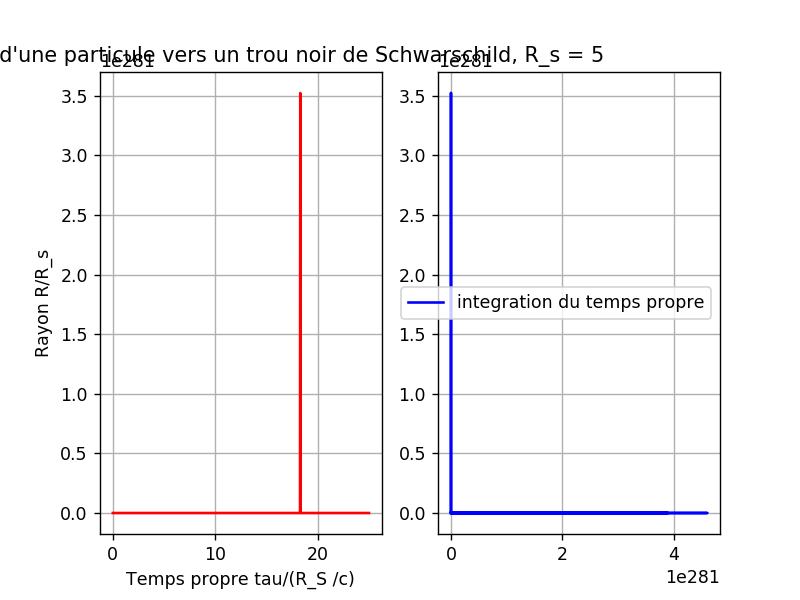

In [205]:
c = 1
R_s = 1

def F_diff(Y, t):
    return np.array([Y[1], -c**2 /2 /(Y[0]**2), R_s/c * np.sqrt(1-1/r_0) / (1-1/Y[0])])

time = np.linspace(0, 25, 1000)

Y = sc.odeint(F_diff, np.array([5, 0, 0]), time)

plt.figure()
plt.subplot(1,2,1)
plt.grid()
plt.title("Chute libre d'une particule vers un trou noir de Schwarschild, R_s = 5")
plt.ylabel("Rayon R/R_s")
plt.xlabel("Temps propre tau/(R_S /c)")
plt.plot(time, Y[:,0], 'r')
plt.subplot(1,2,2)
plt.grid()
plt.plot(Y[:,2], Y[:,0], 'b', label = "integration du temps propre")
plt.legend()
plt.show()